In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [4]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] loading MNIST (full) dataset...")
dataset = datasets.fetch_mldata("MNIST Original")

# scale the raw pixel intensities to the range [0, 1.0], then
# construct the training and testing splits
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data,
dataset.target, test_size=0.25)

[INFO] loading MNIST (full) dataset...


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
#convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [7]:
  # define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [8]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)

[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 4s 81us/step - loss: 2.2840 - accuracy: 0.1861 - val_loss: 2.2502 - val_accuracy: 0.3449
Epoch 2/100
52500/52500 [==============================] - 3s 54us/step - loss: 2.2211 - accuracy: 0.3413 - val_loss: 2.1924 - val_accuracy: 0.3914
Epoch 3/100
52500/52500 [==============================] - 2s 48us/step - loss: 2.1535 - accuracy: 0.5011 - val_loss: 2.1141 - val_accuracy: 0.5695
Epoch 4/100
52500/52500 [==============================] - 3s 49us/step - loss: 2.0600 - accuracy: 0.5853 - val_loss: 2.0043 - val_accuracy: 0.6023
Epoch 5/100
52500/52500 [==============================] - 3s 48us/step - loss: 1.9285 - accuracy: 0.6321 - val_loss: 1.8513 - val_accuracy: 0.6371
Epoch 6/100
52500/52500 [==============================] - 3s 59us/step - loss: 1.7543 - accuracy: 0.6650 - val_loss: 1.6614 - val_accuracy: 0.7130
Epoch 7/100
52500/52500 [==========

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1701
         1.0       0.94      0.97      0.95      1936
         2.0       0.91      0.89      0.90      1827
         3.0       0.91      0.89      0.90      1799
         4.0       0.91      0.94      0.92      1667
         5.0       0.90      0.85      0.87      1584
         6.0       0.92      0.96      0.94      1724
         7.0       0.94      0.93      0.93      1802
         8.0       0.88      0.88      0.88      1720
         9.0       0.90      0.89      0.90      1740

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



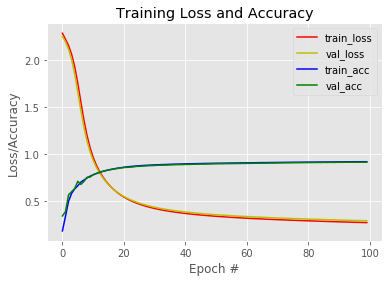

In [13]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss",color="r")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss",color="y")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc",color="b")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc",color="g")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()